In [ ]:
# 2023.5.1
# reconstructed code 

# random init
# poly function

In [ ]:
import os

cuda_device = '0'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train



In [ ]:
import torch.multiprocessing as mp
num_processes = 10


width_vector = [80, 160, 320]

# generate a 2-dimensional matrix to hold the results in (i,j)
result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 0
    
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        

        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()
            result_matrix[i, idx, :] = [error, error_infty]

    

    i += 1


    

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [4]:
print(result_matrix)

[[[3.50195635e-03 1.31326497e-01]
  [9.62585909e-04 6.50138855e-02]
  [2.60469364e-03 8.68343711e-02]
  [4.30526165e-03 9.39924270e-02]
  [5.55251900e-04 4.81941700e-02]
  [3.30629991e-03 1.05374753e-01]
  [7.16488529e-03 1.36763632e-01]
  [6.58406876e-04 6.84036016e-02]
  [1.16890837e-02 1.58805579e-01]
  [1.67050119e-03 9.89480019e-02]]

 [[3.42573883e-04 5.81552722e-02]
  [1.10553438e-03 6.89557195e-02]
  [1.20138901e-03 6.05077744e-02]
  [3.79114092e-04 3.98418605e-02]
  [1.13863440e-03 6.89692497e-02]
  [8.62682879e-04 4.63615656e-02]
  [5.36065432e-04 5.45438826e-02]
  [8.23944516e-04 4.49488759e-02]
  [4.98858630e-04 4.68369126e-02]
  [2.46905576e-04 6.12197630e-02]]

 [[3.68697831e-04 4.72089648e-02]
  [4.66880701e-05 2.40028501e-02]
  [3.56106757e-04 3.92703414e-02]
  [7.31294276e-05 2.08082944e-02]
  [1.88593171e-04 3.06450129e-02]
  [8.59263891e-05 1.97559893e-02]
  [1.36992510e-03 9.02646780e-02]
  [2.35829124e-04 3.01266313e-02]
  [1.06577405e-04 3.24078202e-02]
  [1.65600

(3, 10, 2)
0.09367412529144284
<class 'numpy.ndarray'>
0.0
[0.00240197 0.00062584 0.00018269]
[0.09367413 0.05416352 0.0332597 ]
y_min: [5.55251900e-04 2.46905576e-04 4.66880701e-05]
y_max: [0.01168908 0.00120139 0.00136993]
[[0.00184671 0.00037894 0.00013601]
 [0.00928712 0.00057555 0.00118723]]


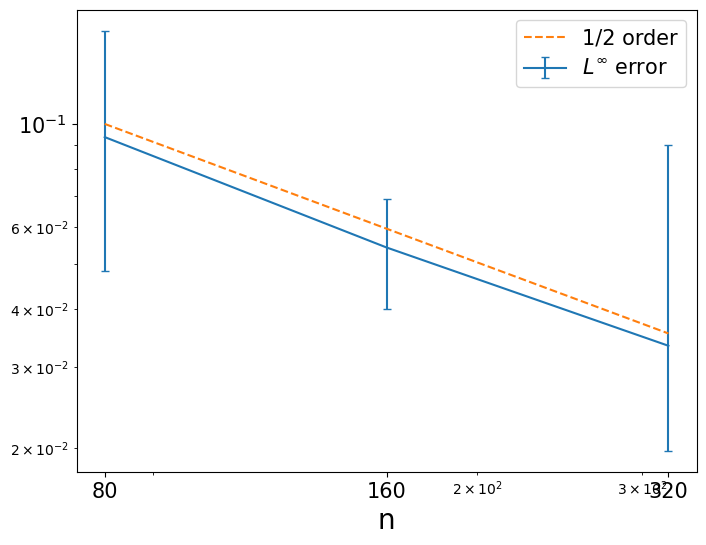

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])


print(mean)
print(mean_inf)

y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]



ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()